In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import re
import os
import math
from multiprocessing import Pool
from tqdm import tqdm
from scipy import stats
## init
mySpecie='Homo_sapiens'
prealigned_dir='/cellar/users/btsui/all_seq_snp/Homo_sapiens_all_merged_snp.TCGA.prealigned.pickle'
targetted_align_dir='/cellar/users/btsui/all_seq_snp/Homo_sapiens_all_merged_snp.TCGA.pickle'


In [2]:
#!ls /cellar/users/btsui/all_seq_snp/Homo_sapiens_all_merged_snp.TCGA.pickle

In [3]:
prealigned_df=pd.read_pickle(prealigned_dir).loc['TCGA']

In [4]:
targetted_df=pd.read_pickle(targetted_align_dir).loc["TCGA"]

In [50]:
#prealigned_df.head()

In [5]:
Run_digits_inter=np.intersect1d(targetted_df.index.get_level_values('Run_digits').unique(),
               prealigned_df.index.get_level_values('Run_digits').unique())
               

In [6]:
len(Run_digits_inter)

342

In [7]:
myRunDigit='2c4ed1e6-85ae-45c1-8c5b-5ef8bfc3aba0'

In [36]:
myDict={}
for myRunDigit in tqdm(Run_digits_inter):
    tmpS1=targetted_df.loc[myRunDigit]['ReadDepth']
    tmpS1=tmpS1.groupby(tmpS1.index.names).first()
    
    tmpS2=prealigned_df.loc[myRunDigit]['ReadDepth']
    tmpS2=tmpS2.groupby(tmpS2.index.names).first()
    
    mergedDf=pd.DataFrame({'targetted':tmpS1,
                  'prealigned':tmpS2}).dropna()
    mergedDf=np.log2(mergedDf+1)
    g=stats.linregress(mergedDf['targetted'],mergedDf['prealigned'])
    r,p=stats.pearsonr(mergedDf['targetted'],mergedDf['prealigned'])
    fractMoreThanOneFold=((mergedDf['targetted']-mergedDf['prealigned']).abs()>1).mean()
    myDict[myRunDigit]={'r':r,'n':mergedDf.shape[0],'slope':g.slope,'fold':fractMoreThanOneFold}
    #print (fractMoreThanOneFold)
    






  0%|          | 0/342 [00:00<?, ?it/s]




  0%|          | 1/342 [00:02<16:36,  2.92s/it]/cellar/users/btsui/anaconda3/lib/python3.6/site-packages/scipy/stats/_stats_mstats_common.py:107: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/cellar/users/btsui/anaconda3/lib/python3.6/site-packages/scipy/stats/_stats_mstats_common.py:117: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
/cellar/users/btsui/anaconda3/lib/python3.6/site-packages/scipy/stats/_stats_mstats_common.py:119: RuntimeWarning: invalid value encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)
/cellar/users/btsui/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:3010: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den





  1%|          | 2/342 [00:05<14:39,  2.59s/it]/cellar/users/btsui/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:3020: 

KeyboardInterrupt: 

0.037037037037037035

In [ ]:
#stats.lingress(mergedDf['targetted'],mergedDf['prealigned'])

In [37]:
statDf=pd.DataFrame(myDict).T.dropna()

In [46]:
statDf[statDf.n>10]['fold'].median()

0.018018018018018018

In [27]:
statDf[statDf.n>10]['slope'].median()

0.9483168308839256

In [24]:
statDf[statDf.n>10]['slope'].quantile(0.025)

0.9189229304525588

In [11]:
import seaborn as sns

/cellar/users/btsui/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/cellar/users/btsui/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


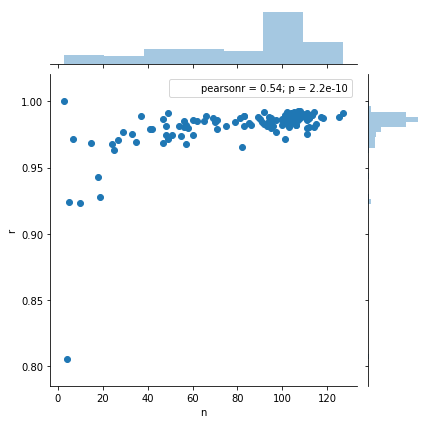

In [12]:
sns.jointplot(data=statDf,x='n',y='r')

In [22]:
#0.94, 0.92
statDf['r'].quantile(0.025)

0.9277931805387337

In [25]:
statDf['r'].median()

0.9847056959600939

In [69]:
import matplotlib.pyplot as plt

/cellar/users/btsui/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,0,'Allelic read count correlation\nbetween targetted alignment and full alignment\n')

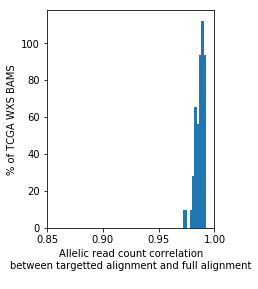

In [73]:
fig,ax=plt.subplots(figsize=(3,4))
statDf[statDf['n']>100].r.plot.hist(normed=True,ax=ax)
ax.set_ylabel('% of TCGA WXS BAMS')
ax.set_xlim([0.85,1.0])
xlabel='Allelic read count correlation\n'\
'between targetted alignment and full alignment\n'
ax.set_xlabel(xlabel)

In [32]:
statDf['r'].quantile(0.025),statDf['r'].quantile(1-0.025)

(0.9277931805387337, 0.9921622434631636)

In [18]:
pd.Series(myDict).quantile(0.05)

TypeError: '<' not supported between instances of 'dict' and 'dict'